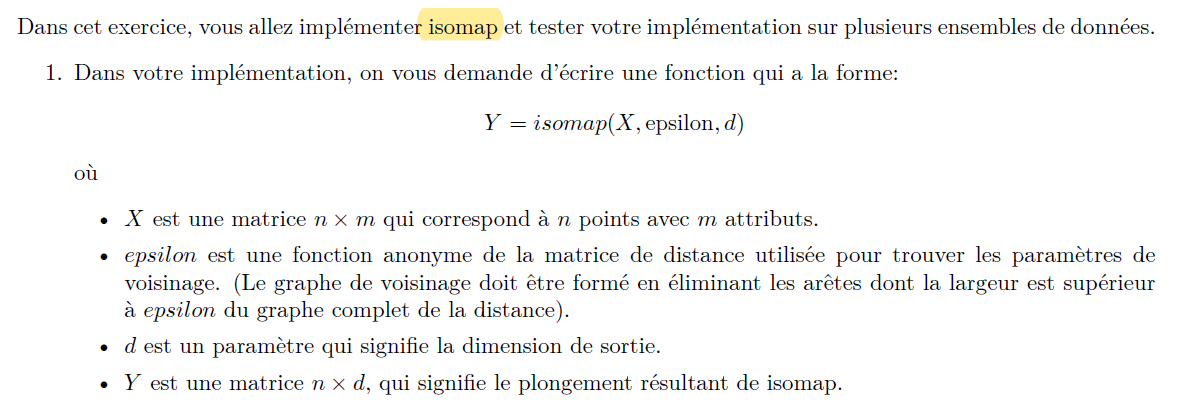

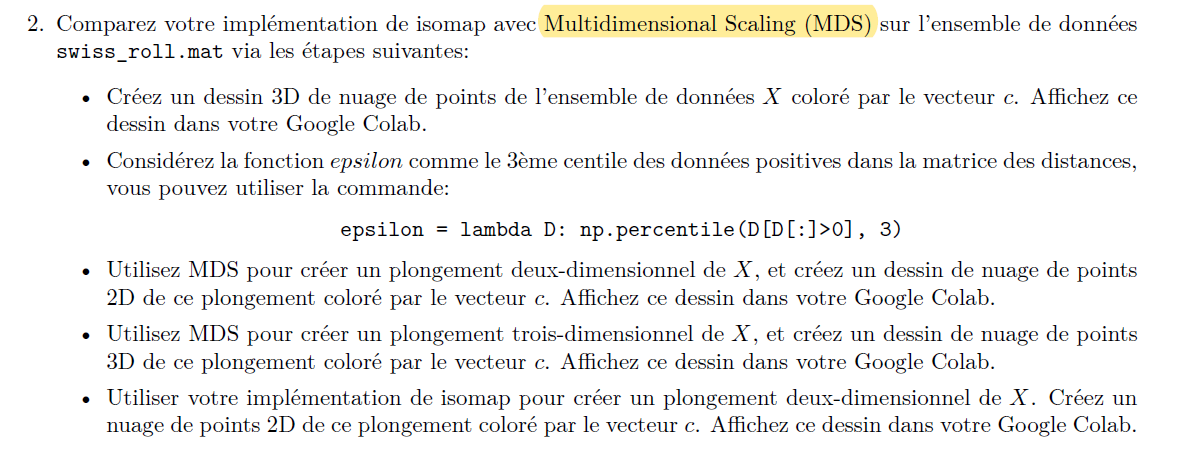

In [1]:
## Effectuez l'exercice en utilisant les "packages" importés suivants selon vos besoins.
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Pour importer les données
from google.colab import files
from scipy.io import loadmat

Question(1) et (2)

implémenter isomap avec la fonction epsilon donnée  
visualiser swiss_roll.mat  
Reference:
http://www-clmc.usc.edu/publications/T/tenenbaum-Science2000.pdf
https://github.com/heucoder/dimensionality_reduction_alo_codes/blob/master/codes/ISOMAP/ISOMAP.py

In [2]:
uploaded_ex2 = files.upload()

Saving swiss_roll.mat to swiss_roll.mat


In [3]:
swill_roll = loadmat('swiss_roll.mat')
swill_roll

{'X': array([[ 0.28572597,  0.05525283,  0.79639781],
        [ 0.31854379,  0.07355252, 18.21963664],
        [ 0.45990808,  0.19398198,  3.62310607],
        ...,
        [12.62783153, -0.40486635,  9.52459663],
        [12.64432181, -0.24806006,  6.79387286],
        [12.65586314, -0.12515367,  5.4186014 ]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Nov 28 15:00:21 2016',
 '__version__': '1.0',
 'c': array([[0.00000000e+00],
        [9.77517107e-04],
        [1.95503421e-03],
        ...,
        [9.98044966e-01],
        [9.99022483e-01],
        [1.00000000e+00]])}

In [4]:
swill_roll['X'].shape

(1024, 3)

In [5]:
# 1. implementer isomap-epsilon 
# step 1: calculate pairwise distance for X
X = swill_roll['X']
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
def distance(X):
  return pairwise_distances(X, metric="euclidean")

In [6]:
# step 2: construct neighborhood graph
def neighborhood(epsilon, distance):
  n = distance.shape[0]
  neighborhood = np.full((n, n), float('inf'))
  
  for i in range(n):
    for j in range(n):
      if distance[i][j] <= epsilon:
        neighborhood[i][j] = distance[i][j]
  
  return neighborhood

def epsilon(matrix):
  return np.percentile(matrix[matrix[:] > 0], 3)

In [7]:
# use Floyd algo to compute the shortest path

def floyd(neighborhood_graph):
  shortest_path = neighborhood_graph.copy()
  n = neighborhood_graph.shape[0]
  for k in range(n):
    for i in range(n):
        for j in range(n):
          len = shortest_path[i, k] + shortest_path[k, j]
          if len < shortest_path[i, j]:
              shortest_path[i, j] = len
  return shortest_path

In [8]:
# Source: https://github.com/heucoder/dimensionality_reduction_alo_codes/blob/master/codes/ISOMAP/ISOMAP.py
# step 3: apply MDS algo

def my_mds(dist, n_dims):
    dist = dist**2
    n = dist.shape[0]
    T1 = np.ones((n,n))*np.sum(dist)/n**2
    T2 = np.sum(dist, axis = 1)/n
    T3 = np.sum(dist, axis = 0)/n

    B = -(T1 - T2 - T3 + dist)/2

    eig_val, eig_vector = np.linalg.eig(B)
    index_ = np.argsort(-eig_val)[:n_dims]
    picked_eig_val = eig_val[index_].real
    picked_eig_vector = eig_vector[:, index_]

    return picked_eig_vector*picked_eig_val**(0.5)

In [9]:
def epsilon_isomap(X, d):
  dist = distance(X)
  epsilon_ = epsilon(dist)
  neighborhood_graph = neighborhood(epsilon_, dist)
  shortest_path = floyd(neighborhood_graph)
  res_reduce_dim = my_mds(shortest_path, d)
  return res_reduce_dim


In [10]:
# Source: https://github.com/heucoder/dimensionality_reduction_alo_codes/blob/master/codes/ISOMAP/ISOMAP.py

def scatter_3d(X, y):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=30)
    ax.view_init(10, -70)
    ax.set_xlabel("$x_1$", fontsize=18)
    ax.set_ylabel("$x_2$", fontsize=18)
    ax.set_zlabel("$x_3$", fontsize=18)
    plt.show()

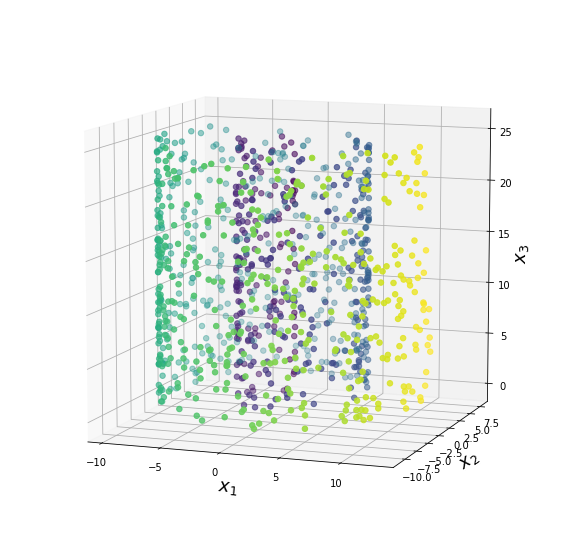

In [11]:
# 2. Visualisation 
# (1) Créez un dessin 3D de nuage de points de l’ensemble de données X coloré par le vecteur c. 
X = swill_roll['X']
Y = swill_roll['c']
scatter_3d(X, Y)

In [12]:
# (2)  
# it will take 14 minutes because the complexity of floyd is n^3 
res_isomap = epsilon_isomap(X, 2)
res_isomap

array([[ 35.76760712+0.j, -13.14213951+0.j],
       [ 35.8225412 +0.j,   6.01851623+0.j],
       [ 37.28366783+0.j, -10.47826464+0.j],
       ...,
       [-39.71958686+0.j,  -2.5234516 +0.j],
       [-39.86548309+0.j,  -5.4201462 +0.j],
       [-40.04661475+0.j,  -6.65285758+0.j]])

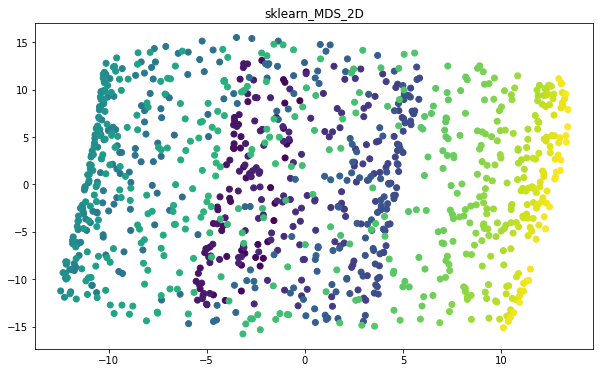

In [13]:
# (3) Utilisez MDS pour créer un plongement deux-dimensionnel de X, et créez un dessin de nuage de points
# 2D de ce plongement coloré par le vecteur c.
from sklearn.manifold import MDS
embedding_2d = MDS(n_components=2)
X_transformed_2d = embedding_2d.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.title("sklearn_MDS_2D")
plt.scatter(X_transformed_2d[:, 0], X_transformed_2d[:, 1], c = Y)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


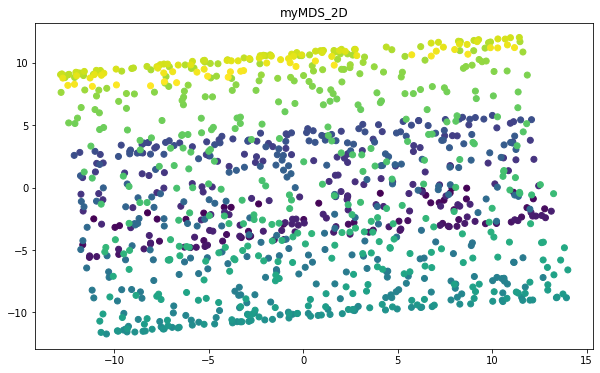

In [14]:
# utiliser la fonction my_mds 
dist = distance(X)
mymds_2d = my_mds(dist, 2)
plt.figure(figsize=(10, 6))
plt.title("myMDS_2D")
plt.scatter(mymds_2d[:, 0], mymds_2d[:, 1], c = Y)

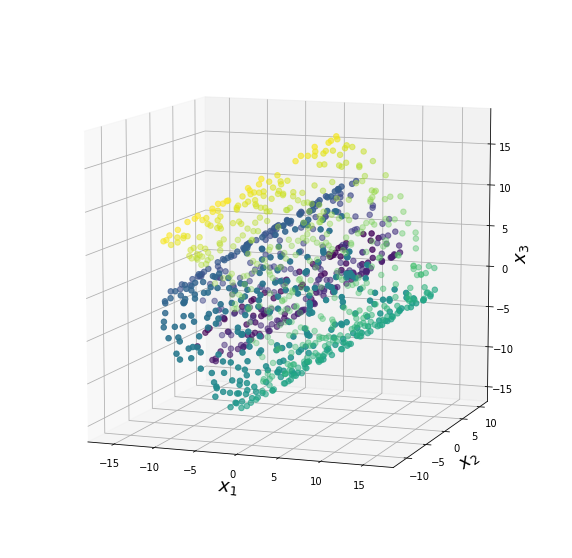

In [15]:
# (4) Utilisez MDS pour créer un plongement trois-dimensionnel de X, et créez un dessin de nuage de points
# 3D de ce plongement coloré par le vecteur c.
from sklearn.manifold import MDS
embedding_3d = MDS(n_components=3)
X_transformed_3d = embedding_3d.fit_transform(X)
scatter_3d(X_transformed_3d, Y)
plt.show()

In [16]:
# utiliser la fonction my_mds 
dist1 = distance(X)

In [17]:
mymds_3d = my_mds(dist1, 3)
mymds_3d 

array([[-11.07241938+0.j,  -2.50232411+0.j,  -1.53603555+0.j],
       [  6.29932935+0.j,  -0.23063491+0.j,  -2.57485602+0.j],
       [ -8.22772463+0.j,  -2.01862744+0.j,  -2.05849584+0.j],
       ...,
       [ -3.96256791+0.j,   8.85459321+0.j,  -8.38546078+0.j],
       [ -6.69025431+0.j,   8.41477442+0.j,  -8.33624146+0.j],
       [ -8.06876272+0.j,   8.16317035+0.j,  -8.32810788+0.j]])

In [18]:
mymds_3d = mymds_3d.real

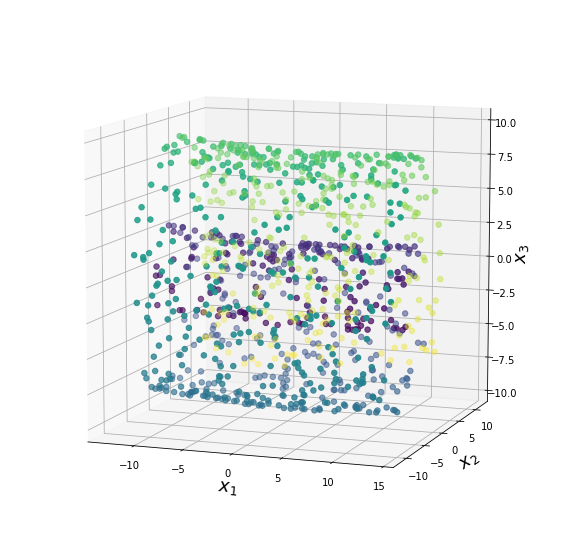

In [19]:
scatter_3d(mymds_3d, Y)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


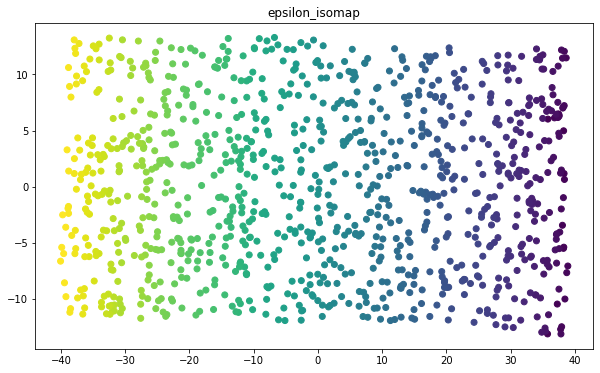

In [20]:
# (5) Utiliser votre implémentation de isomap pour créer un plongement deux-dimensionnel de X. Créez un
# nuage de points 2D de ce plongement coloré par le vecteur c.

plt.figure(figsize=(10, 6))
plt.title("epsilon_isomap")
plt.scatter(res_isomap[:, 0], res_isomap[:, 1], c = Y)

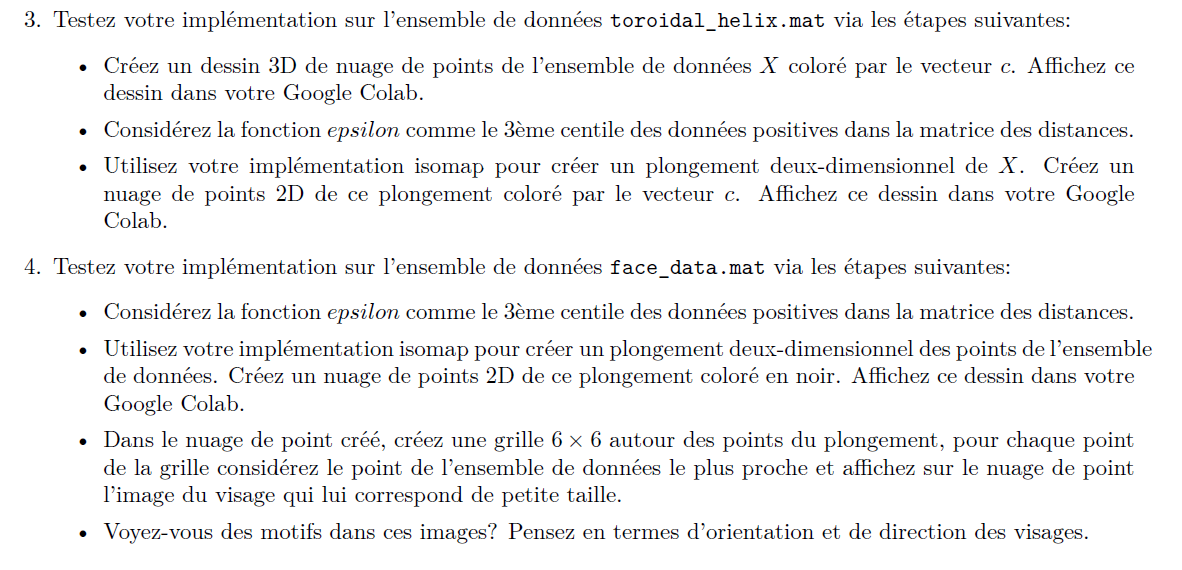

In [21]:
# 3. Testez votre implémentation sur l’ensemble de données toroidal_helix.mat
# (1) Créez un dessin 3D de nuage de points de l’ensemble de données X coloré par le vecteur c.
uploaded_ex2_3 = files.upload()

Saving toroidal_helix.mat to toroidal_helix.mat


In [22]:
toroidal_helix = loadmat('toroidal_helix.mat')

In [23]:
X_toro = toroidal_helix['X']
c_toro = toroidal_helix['c']

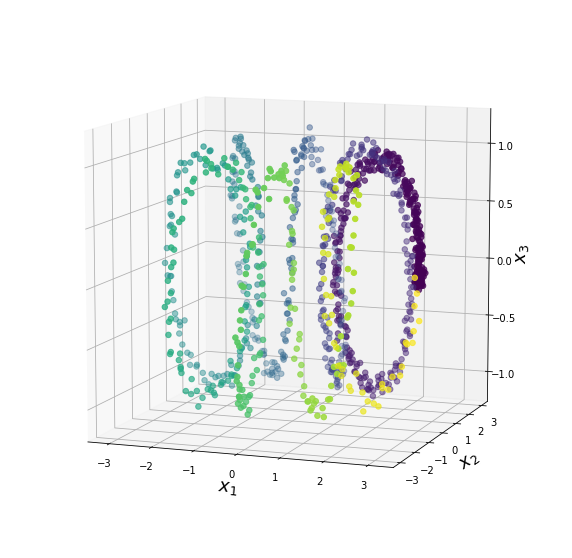

In [24]:
scatter_3d(X_toro, c_toro)

In [25]:
# (2) Considérez la fonction epsilon comme le 3ème centile des données positives dans la matrice des distances.
# it will take 14 minutes 
res_isomap_toro = epsilon_isomap(X_toro, 2)
res_isomap_toro

array([[5.04640826, 2.61902281],
       [4.99846339, 2.60623533],
       [5.01457628, 2.60928751],
       ...,
       [5.12186002, 2.92542624],
       [5.02903729, 2.70006488],
       [4.97740893, 2.58844934]])

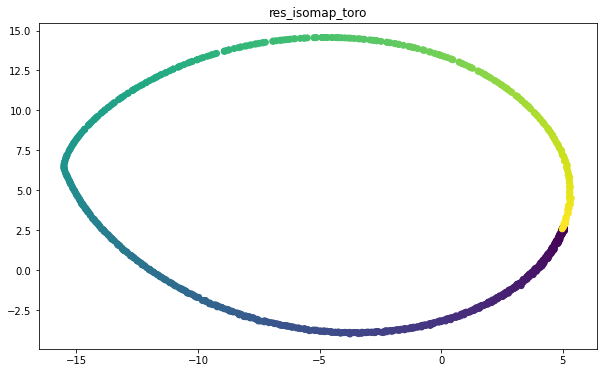

In [26]:
# (3) Utilisez votre implémentation isomap pour créer un plongement deux-dimensionnel de X. Créez un
# nuage de points 2D de ce plongement coloré par le vecteur c.
plt.figure(figsize=(10, 6))
plt.title("res_isomap_toro")
plt.scatter(res_isomap_toro[:, 0], res_isomap_toro[:, 1], c = c_toro)

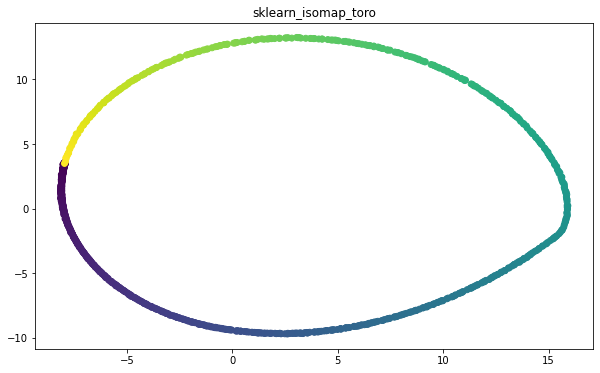

In [27]:
# compared to isomap in sklean 
from sklearn.manifold import Isomap
embedding_toro = Isomap(n_neighbors=10, n_components=2)
X_transformed_toro = embedding_toro.fit_transform(X_toro)
plt.figure(figsize=(10, 6))
plt.title("sklearn_isomap_toro")
plt.scatter(X_transformed_toro[:, 0], X_transformed_toro[:, 1], c = c_toro)

In [28]:
# 4. Testez votre implémentation sur l’ensemble de données face_data.mat
uploaded_ex2_4 = files.upload()

Saving face_data.mat to face_data.mat


In [29]:
face_data = loadmat('face_data.mat')

In [30]:
face_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'lights', 'images', 'image_pcs', 'poses'])

In [31]:
face_data['image_pcs'].shape, face_data['images'].shape, face_data['lights'].shape, face_data['poses'].shape

((240, 698), (4096, 698), (1, 698), (2, 698))

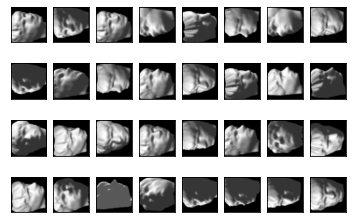

In [32]:
import numpy as np
images = np.transpose(face_data['images'])

fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    image = images[i]
    image = np.reshape(image, (64, 64, 1)).squeeze()    
    axi.imshow(image, cmap='gray')

In [33]:
# (1) Considérez la fonction epsilon comme le 3ème centile des données positives dans la matrice des distances.
faces = np.transpose(face_data['images'])
# res_isomap_faces = epsilon_isomap(faces, 2)
# res_isomap_faces

In [34]:
# (2) Utilisez votre implémentation isomap pour créer un plongement deux-dimensionnel des points de l’ensemble
# de données. Créez un nuage de points 2D de ce plongement coloré en noir.

# en (1), cela prend beaucoup de temps si j'utilise mon implémentation
# c'est pour ca que j'utilise Isomap dans sklearn

from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces)
proj.shape

(698, 2)

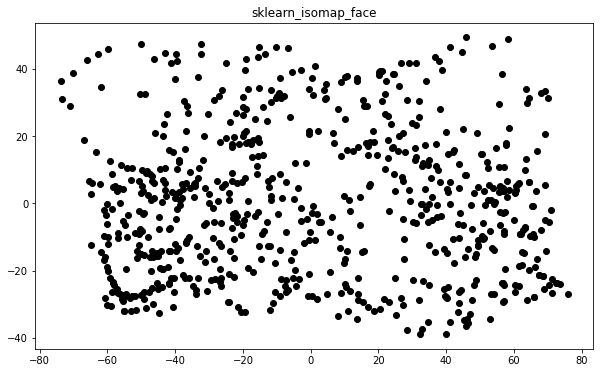

In [35]:
plt.figure(figsize=(10, 6))
plt.title("sklearn_isomap_face")
plt.scatter(proj[:, 0], proj[:, 1], c = 'k')

In [36]:
# (3) Dans le nuage de point créé, créez une grille 6 × 6 autour des points du plongement, pour chaque point
# de la grille considérez le point de l’ensemble de données le plus proche et affichez sur le nuage de point
# l’image du visage qui lui correspond de petite taille.

# Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

from matplotlib import offsetbox
from PIL import Image

def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            
            each_array = images[i]
            im = Image.fromarray(np.uint8((each_array)*255))
            im = im.resize((40, 40))
            im = im.rotate(270)
            pic2array = np.array(im)

            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(pic2array, cmap=cmap), proj[i])
            ax.add_artist(imagebox)

In [37]:
images = faces.copy()
images.shape
images = np.reshape(images, (698, 64, 64))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


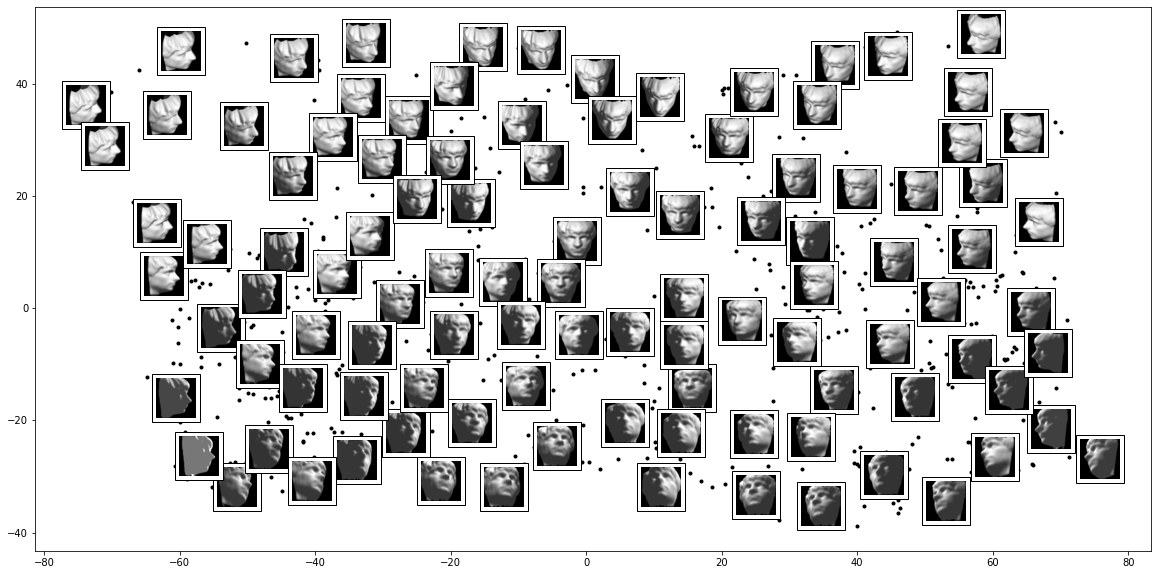

In [38]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_components(faces, model=Isomap(n_components=2), images = images)

Les images avec la même orientation et direction des visages sont regroupées dans le même "cluster".